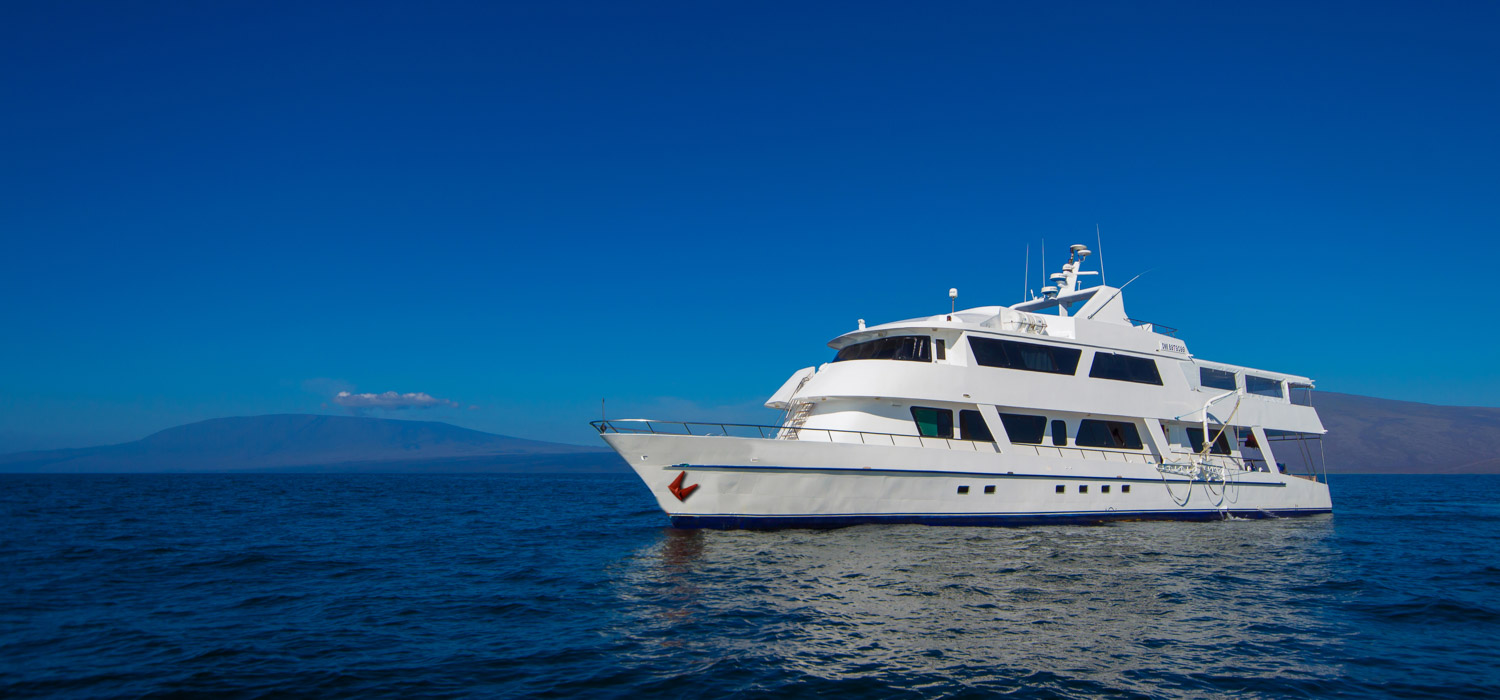

<center>
    
### Nearly New Nautical - A Data Analysis Project
___

<center>
   Pablo Cumbrera Conde

### Project Index
- 1. Background & Key Questions
- 2. Dataset
- 3. Analysis Plan
- 4. Visualizations
- 5. Conclussions 

##### 1. Background

Nearly New Nautical is a website that allows users to advertise their used boats for sale. The
marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed
to help sellers to get more views of their boat, as well as stay on top of market trends. The
Head of Marketing has laid out an ambitious goal of increasing the number of readers by 75%
this year.


##### 1.1 Key Questions
- Is it the most expensive boats that get the most views?
-  Are there common features among the most viewed boats?

### 2. Dataset

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [133]:
df_path = 'boat_data.csv'
dataset = pd.read_csv(df_path)
print("Boat dataset")
dataset.head(10)

Boat dataset


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy,180


In [3]:
# Genertal stats
print("El DF tiene una longitud de ", len(dataset), "filas y", len(dataset.columns), "columnas")
print(" ")
print(dataset.isna().value_counts())

El DF tiene una longitud de  9888 filas y 10 columnas
 
Price  Boat Type  Manufacturer  Type   Year Built  Length  Width  Material  Location  Number of views last 7 days
False  False      False         False  False       False   False  False     False     False                          7019
                                                                  True      False     False                          1457
                  True          False  False       False   False  False     False     False                          1059
                                                                  True      False     False                           255
                  False         False  False       False   False  False     True      False                            29
                                                           True   True      False     False                            18
                                                                  False     False     False       

In [4]:
# Ponemos nombre columnas en minusculas

dataset.columns = dataset.columns.str.lower()
print(dataset.columns)

Index(['price', 'boat type', 'manufacturer', 'type', 'year built', 'length',
       'width', 'material', 'location', 'number of views last 7 days'],
      dtype='object')


### 3. Analysis plan

As a goal analysis plan will follow:
- Data Treatment and cleansing
- Q1
- Q2
- Conclussions

### 4. Visualizations

##### 4.1 Is it the most expensive boats that get the most views?

In [5]:
# Extraemos los barcos con mayor precio

# Para ello primero separamos el precio del currency de moneda y standarizamos la cantidad

quantity = []
currency = []

for i in range( 0, len(dataset.index)):
    
    quantity.append(dataset["price"][i].split(" ")[1])
    currency.append(dataset["price"][i].split(" ")[0])

# Añadimos al DF

dataset['quantity'] = quantity
dataset['currency'] = currency

# Estandarizamos las cantidades a una única moneda

print("Monedas en las que se registran ventas: ")
print(dataset['currency'].value_counts())

Monedas en las que se registran ventas: 
EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64


In [6]:
# Fecha actual
now = datetime.now()


print("Atención los cambios de moneda sons ensibles a fluctuaciones")
print("El día actual es {}".format(datetime.today()))
print("Cambio CHF : 1,02 EUR ")
print("Cambio AL : 1,16 EUR ")
print("Cambio DKK : 0,13 EUR ")

# Start

dataset.quantity = dataset['quantity'].astype('float')
new_quantities = []

for i in range(0, len(dataset)):
    
    if dataset['currency'][i] == 'CHF':
        new_quantities.append(dataset['quantity'][i] * 1.02)
    elif dataset['currency'][i] == 'Â£':
        new_quantities.append(dataset['quantity'][i] * 1.16)
    elif dataset['currency'][i] == 'DKK':
        new_quantities.append(dataset['quantity'][i] * 0.13)
    else:
        new_quantities.append(dataset['quantity'][i])
        
# Añadimos a DF
dataset['euro price'] = np.round(new_quantities, 2)

# Elimina columnas innecesarias
dataset.drop(['quantity', 'currency', 'price'], axis = 1, inplace = True)
dataset.head()

Atención los cambios de moneda sons ensibles a fluctuaciones
El día actual es 2022-10-19 08:49:47.924726
Cambio CHF : 1,02 EUR 
Cambio AL : 1,16 EUR 
Cambio DKK : 0,13 EUR 


,boat type,manufacturer,type,year built,length,width,material,location,number of views last 7 days,euro price
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,3403.74
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,3490.00
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,3845.40
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,3367.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,3399.00


In [7]:
# Extramos mayopres visitas y mayores precios

# Top 100

    # Precio
top100_price = dataset.sort_values('euro price', ascending = False
                                  ).head(100).reset_index()
    # Visitas
top100_visits = dataset.sort_values('number of views last 7 days', ascending = False
                                   ).head(100).reset_index()

# 10 porciento mayor

    # Precio
top10percent_price = dataset.sort_values('euro price', ascending = False
                                        ).head(len(dataset)//10).reset_index()
    # Visitas
top10percent_visits = dataset.sort_values('number of views last 7 days', ascending = False
                                         ).head( len(dataset)//10).reset_index()

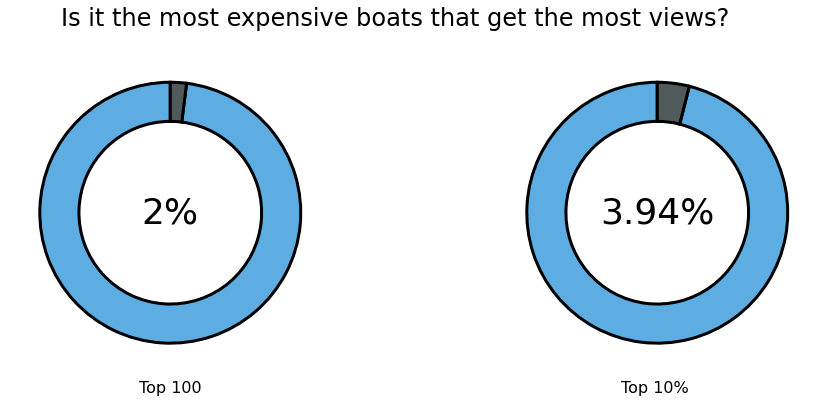

In [8]:
# Mostramos gráficamente
a = top100_price['index'].isin(top100_visits['index']).value_counts()
b = top10percent_price['index'].isin(top10percent_visits['index']).value_counts()

#Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
  
    
# Titulo
fig.suptitle('Is it the most expensive boats that get the most views? \n \n', fontsize = 24)

# Detalles
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}


# Pie charts

    # [0]
axes[0].pie(a, wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
axes[0].text(0, 0, "2%", ha ='center', va ='center', fontsize = 36)
axes[0].set_xlabel("Top 100", fontsize = 16)

    # [1]
axes[1].pie(b, wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
axes[1].text(0, 0, "3.94%", ha ='center', va ='center', fontsize = 36)
axes[1].set_xlabel("Top 10% ", fontsize  = 16)


# Show
plt.show()

##### 4.2  Are there common features among the most viewed boats?

In [9]:
# Eliminamos el index de los dos DF de uso

top100_visits.drop("index", axis = 1, inplace = True)
top10percent_visits.drop("index", axis = 1, inplace = True)


In [74]:
# Creamos una función para poder plotear las variables categóricas

def most_viewed_plotter(suptitulo, columna, title):

    #Plot
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(18, 12), constrained_layout = True)
  

    # Titulo
    fig.suptitle(suptitulo + '\n', fontsize = 30)

    # Orden de ticks
    a = list(top100_visits[columna].value_counts().reset_index()['index'])
    b = list(top10percent_visits[columna].value_counts().reset_index()['index'])

        # top 100
    sns.countplot(ax = ax0, x = columna, data = top100_visits, order = a)
    ax0.set_title('Top 100 ' + title, fontsize = 18)
    ax0.set_xticklabels(a, rotation=40, ha="right", fontsize = 14)

        # Top 10%
    sns.countplot(ax = ax1, x = columna, data = top10percent_visits, order = b)
    ax1.set_title('Top 10% ' +  title, fontsize = 18)
    ax1.set_xticklabels(b, rotation=40, ha="right", fontsize = 12)

    # Plot
    plt.show()

In [129]:
# Creamos una función para poder plotear las variables categóricas

def most_viewed_hist(suptitulo, columna, title, rangelen, rangestep):

    # Plot
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(18, 12), constrained_layout = True)
  
    # Labels
    a = list(range(0, rangelen, rangestep))
    b = list(range(0, rangelen, rangestep))
    
    
    # Titulo
    fig.suptitle(suptitulo + '\n', fontsize = 30)

        # top 100
    ax0.hist(top100_visits[columna], bins = a)
    ax0.set_title('Top 100 ' + title, fontsize = 18)
    ax0.set_xticks(a, fontsize = 14)


        # Top 10%
    ax1.hist(top10percent_visits[columna], bins = b)
    ax1.set_title('Top 10% ' +  title, fontsize = 18)
    ax1.set_xticks(b, fontsize = 14)
    
    # Plot
    plt.show()

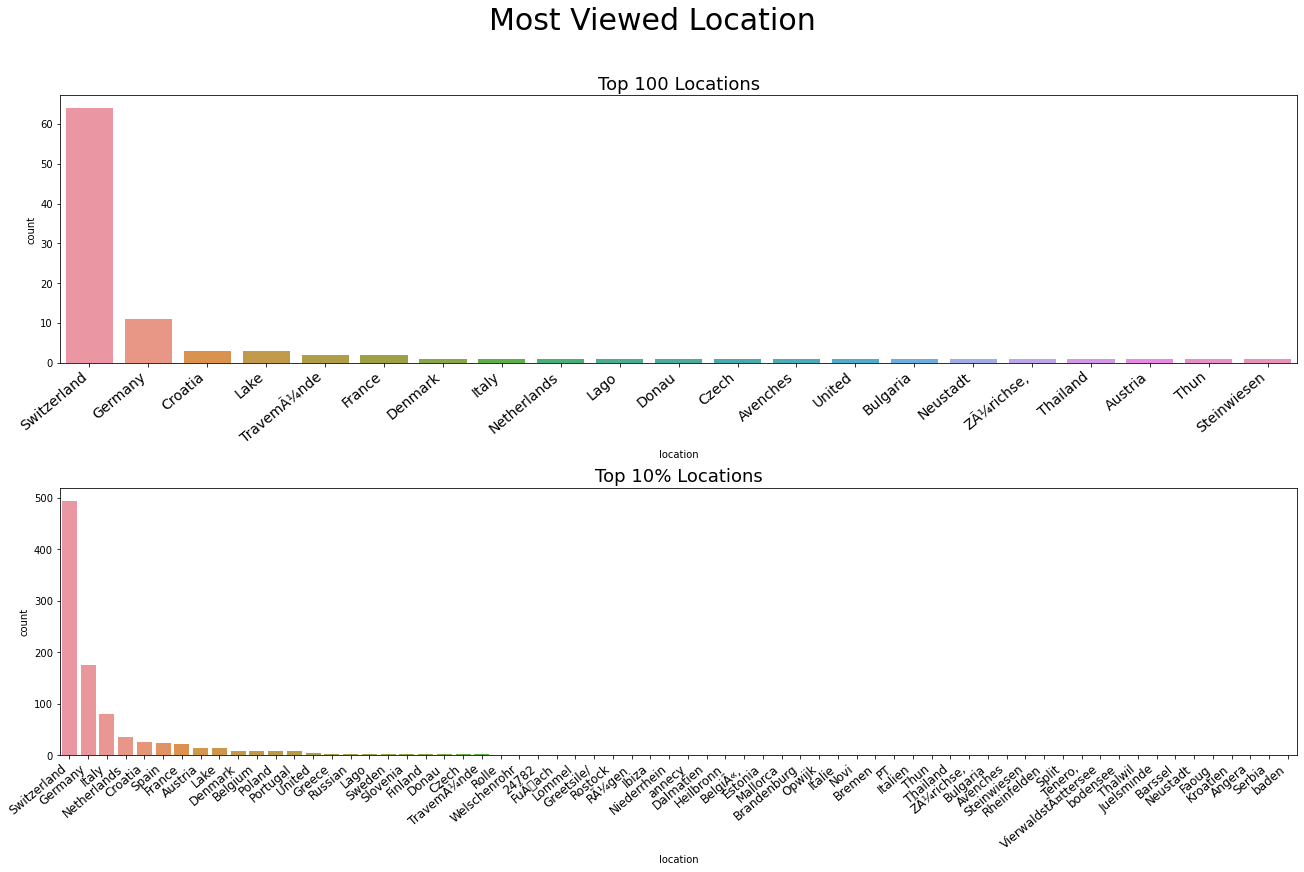

In [63]:
most_viewed_plotter('Most Viewed Location', 'location', 'Locations')

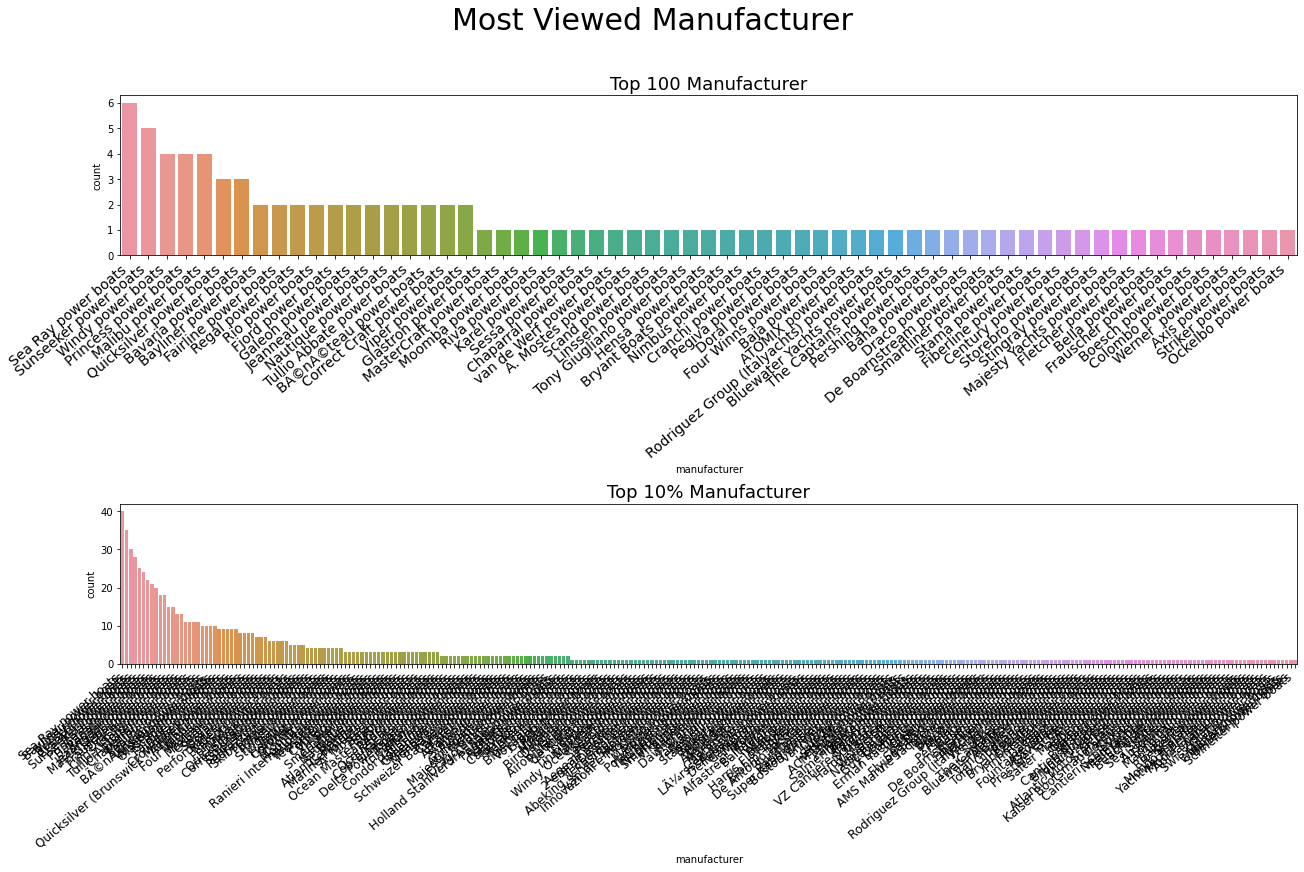

In [64]:
most_viewed_plotter('Most Viewed Manufacturer', 'manufacturer', 'Manufacturer')

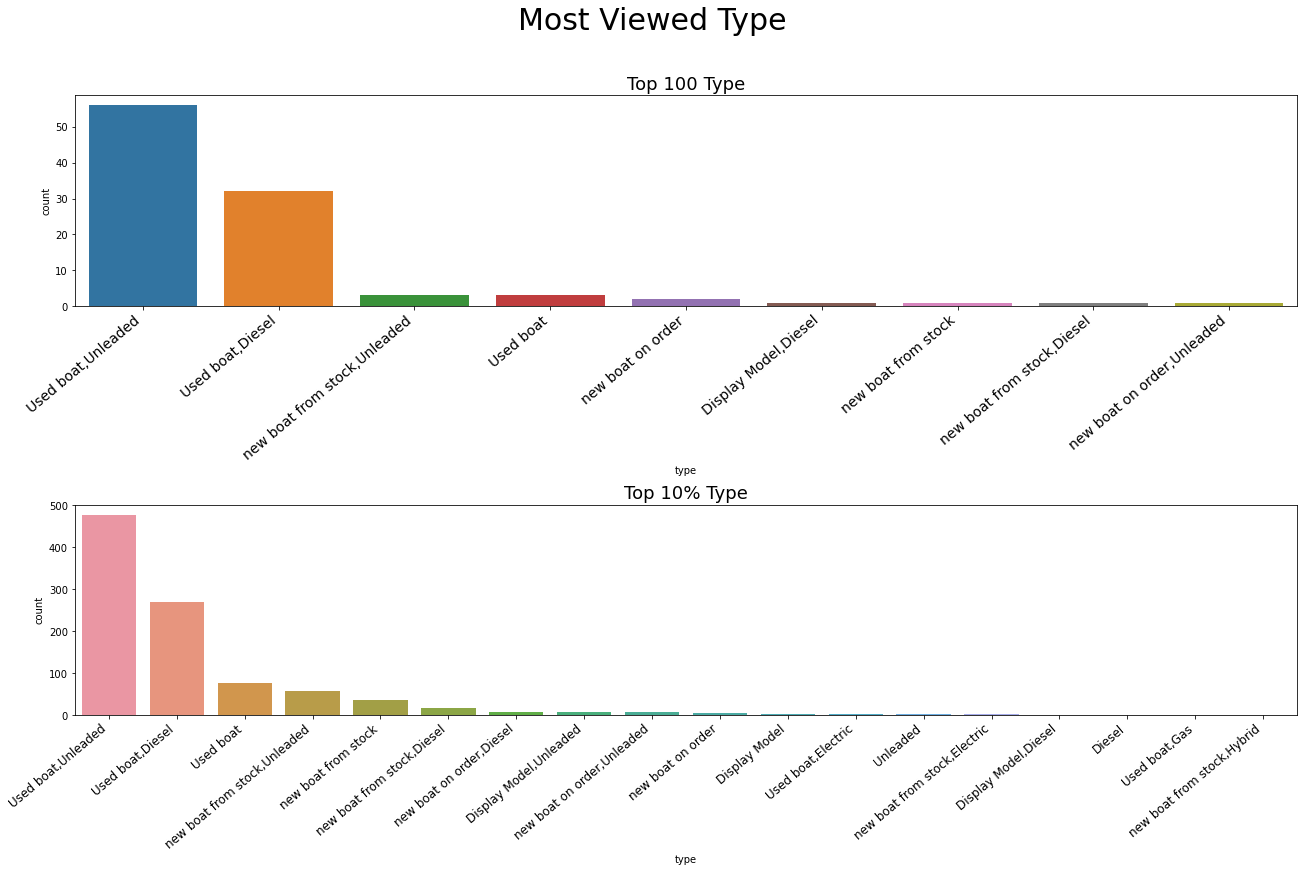

In [65]:
most_viewed_plotter('Most Viewed Type', 'type', 'Type')

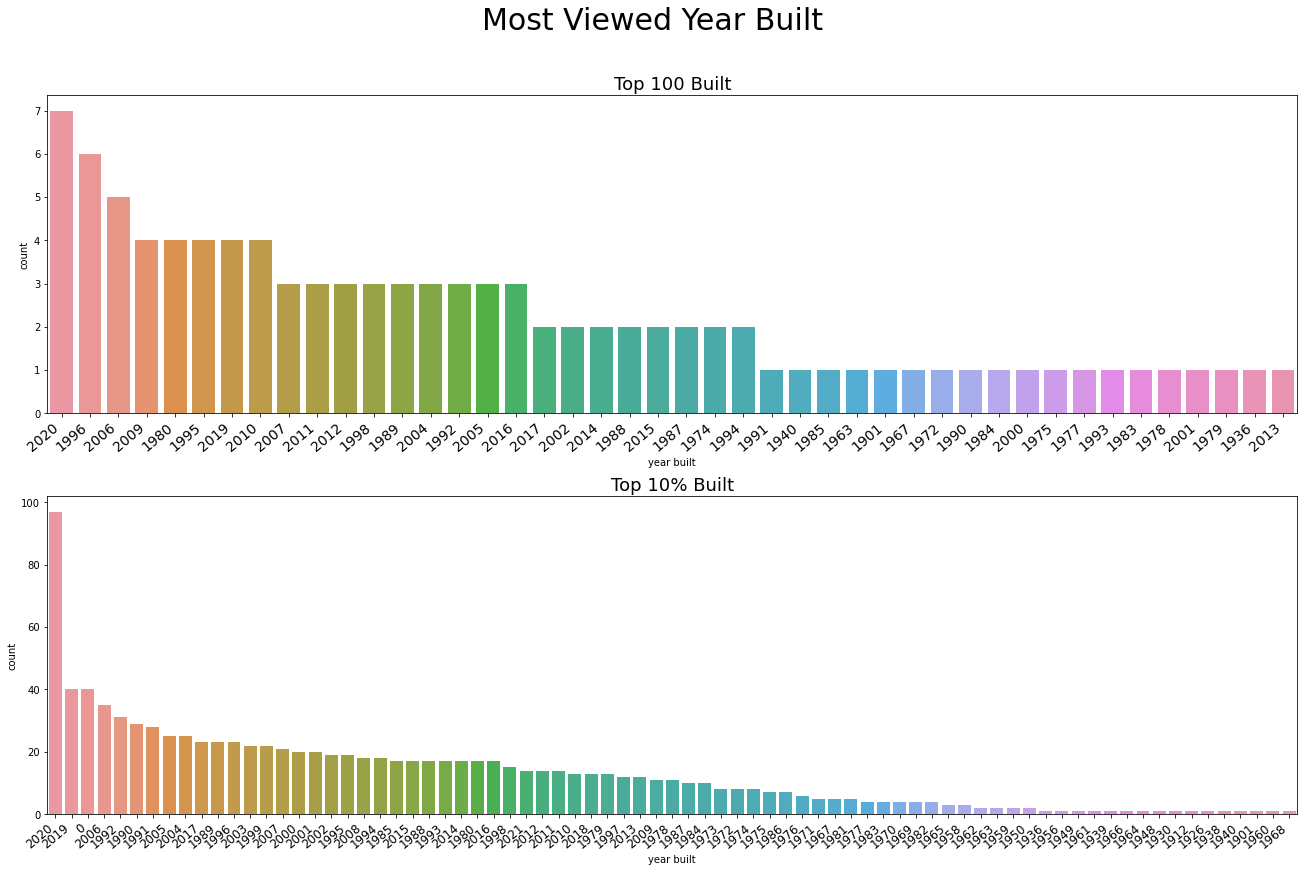

In [66]:
most_viewed_plotter('Most Viewed Year Built', 'year built', 'Built')

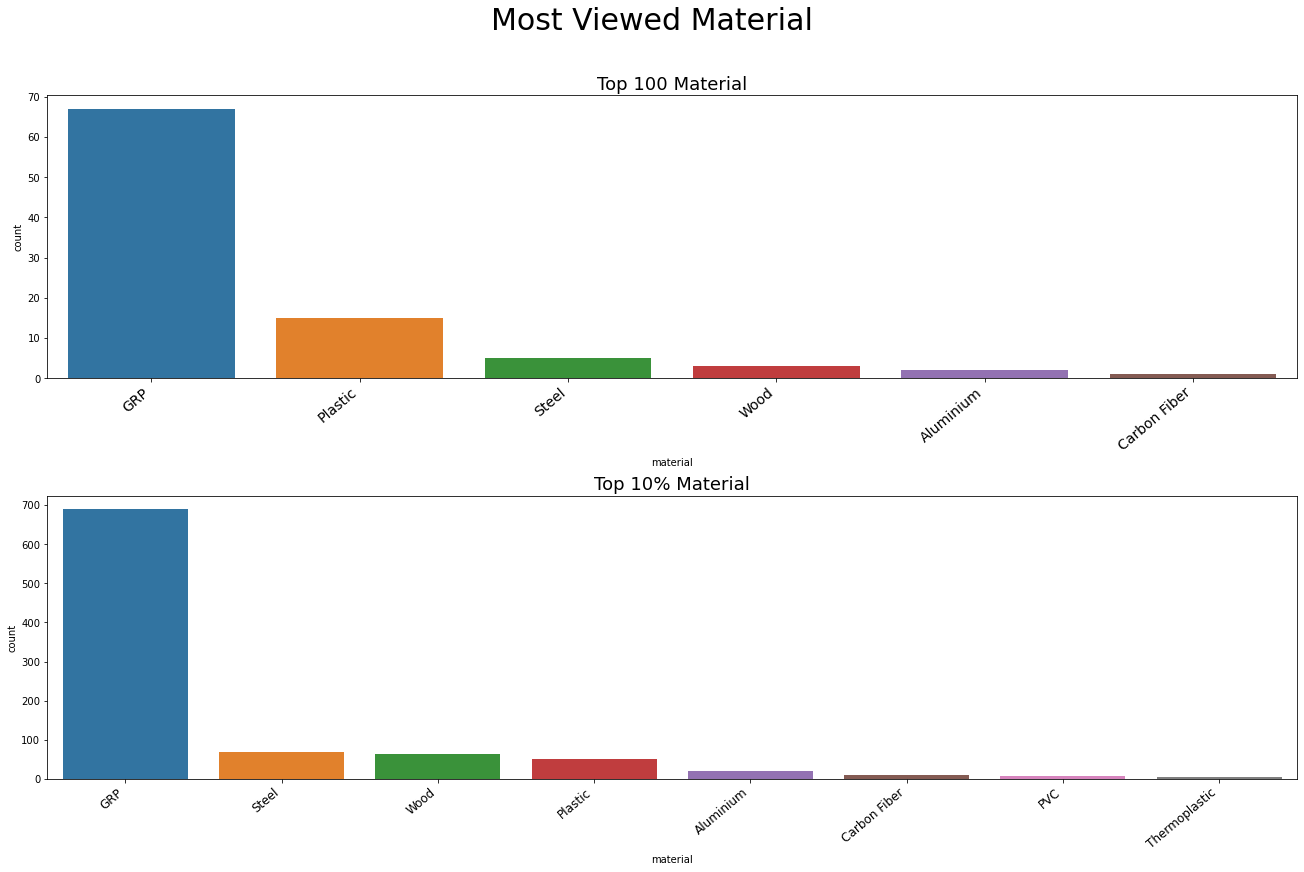

In [67]:
most_viewed_plotter('Most Viewed Material', 'material', 'Material')

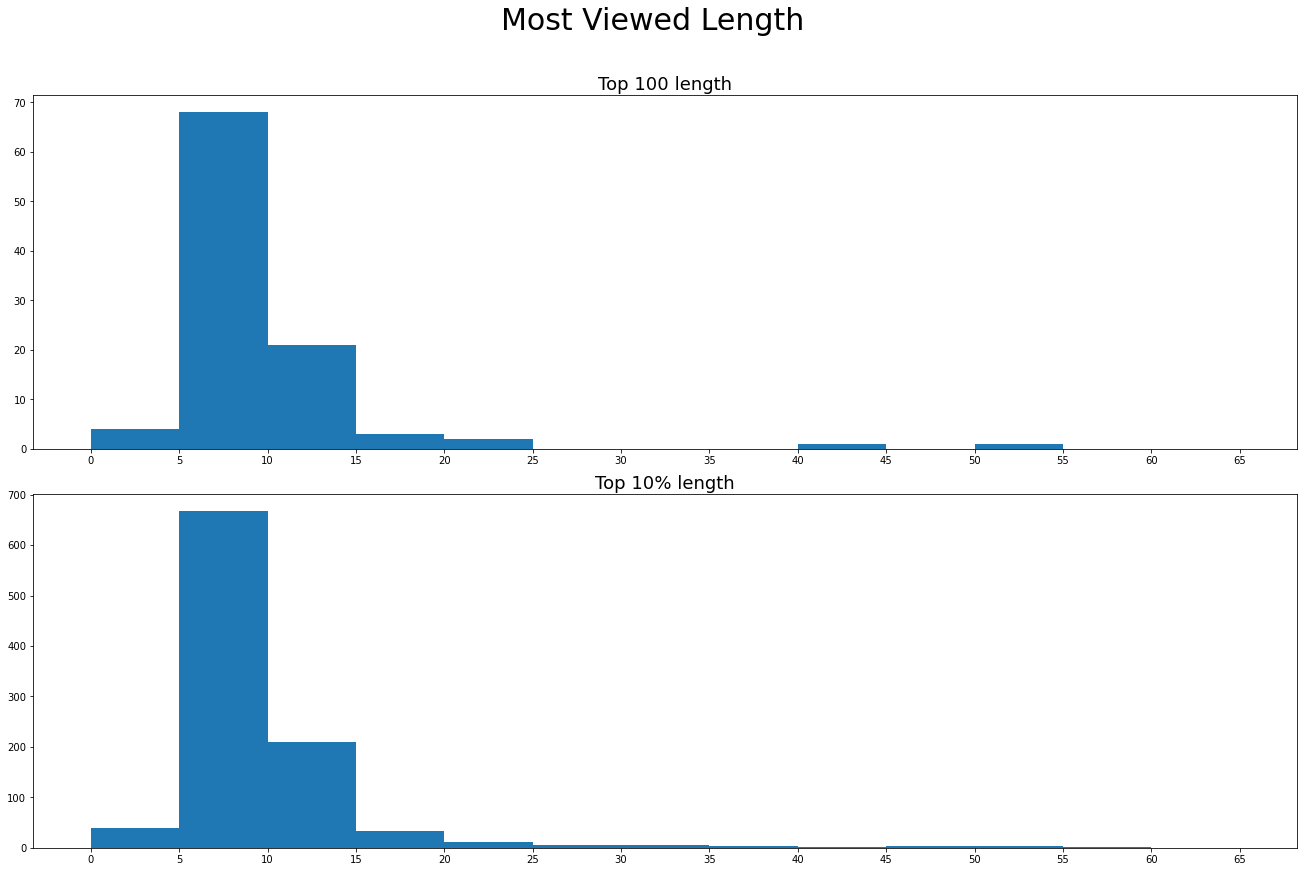

In [132]:
most_viewed_hist('Most Viewed Length', 'length', 'length', 70, 5)

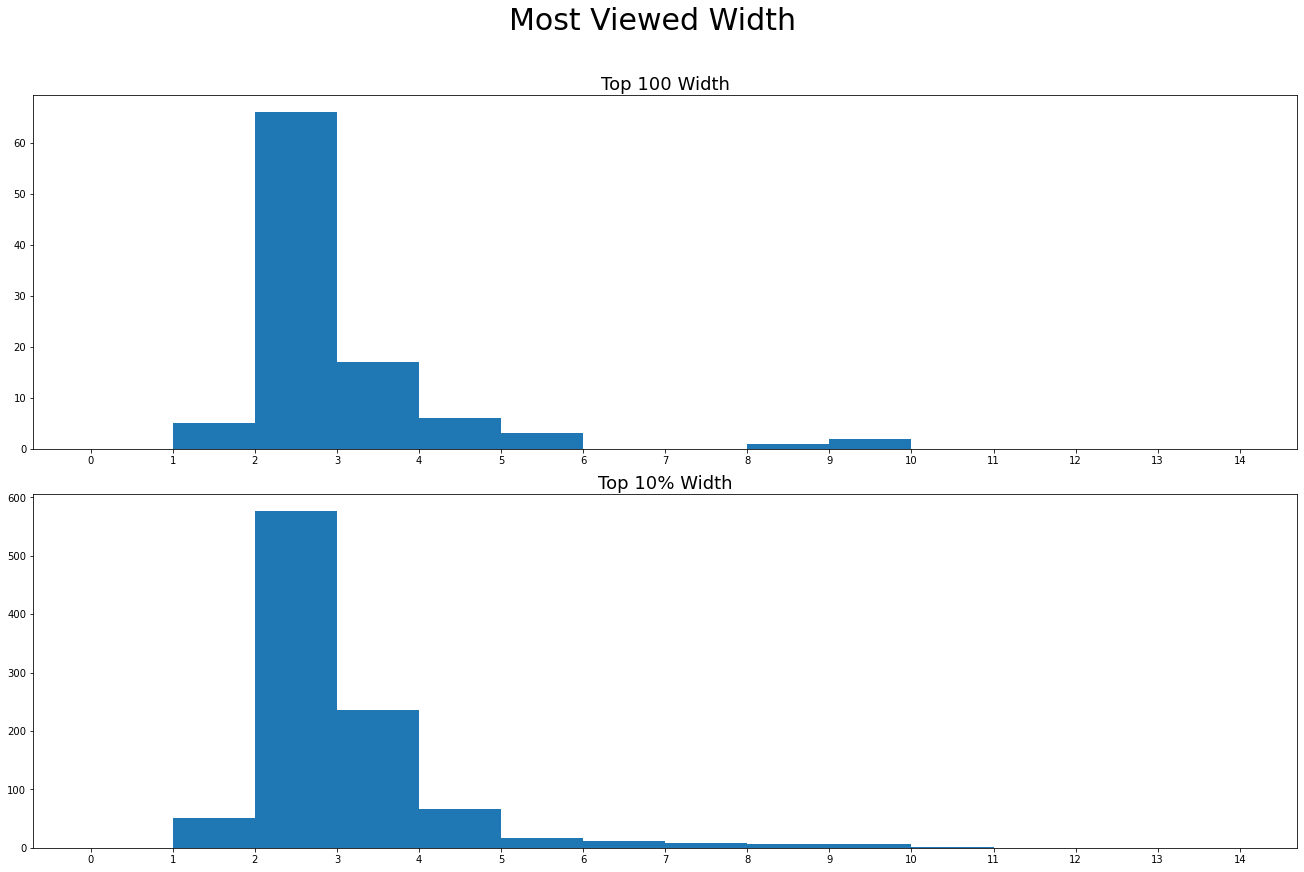

In [131]:
most_viewed_hist('Most Viewed Width', 'width', 'Width', 15, 1)

### 5. Conclussions

- Most priced boats are not contemplated as most viewed
- Best features are made in Switzerland, used boat unleaded, from 5 to 10 mts lenght, GRP, recently made (10 years)